# Sep 25th, 2021

**Motivation**: This has the most succesfull registration of Nissl to Yale N162 0.1 mm <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import load_allen, make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
mice = Mice(Config(32), load_preproc=True)

In [3]:
from register.register import *
reg = Register(mice, resolution=100)

In [4]:
key = 'sub-SLC01_ses-2'
indiv = mice.T1w[key].get_data()
indiv = reg._prepare(indiv)
m_indiv = mice.mask3d[key].get_data()
m_indiv = reg._prepare(m_indiv.astype('uint32'))
print(key)

sub-SLC01_ses-2

## Do

In [ ]:
df_tx, best_tx, perf = reg.fit_register(
    mode='3d',
    name='indiv2nissl',
    fixed=reg.nissl,
    moving=indiv,
    save_results=False,
    types=['SyN', 'ElasticSyN', 'SyNAggro'],
    grads=[0.2],
    syn_bins=[16],
    aff_bins=[16],
    aff_rates=[0.2, 0.5, 0.8],
    n_seeds=5,
)

  0%|          | 0/5 [00:00<?, ?it/s]

In [7]:
_df = df_tx.loc[
    (df_tx['seed'] == 0) &
    (df_tx['type'] == 'SyN') &
    (df_tx['grad'] == 0.3) &
    (df_tx['syn_bin'] == 32) &
    (df_tx['aff_bin'] == 20) &
    (df_tx['aff_rate'] == 0.5)
]
_df


,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score,tx
80,0,SyN,0.3,32,20,0.5,mi,0.610259,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
81,0,SyN,0.3,32,20,0.5,sym_iso,0.999834,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
82,0,SyN,0.3,32,20,0.5,sym_vis,0.996890,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
83,0,SyN,0.3,32,20,0.5,sym,0.998362,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
84,0,SyN,0.3,32,20,0.5,mi_fixed,0.562385,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
85,0,SyN,0.3,32,20,0.5,sym_iso_fixed,0.993872,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
86,0,SyN,0.3,32,20,0.5,sym_vis_fixed,0.922659,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
87,0,SyN,0.3,32,20,0.5,sym_fixed,0.958266,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


In [8]:
_df = df_tx.loc[
    (df_tx['seed'] == 4) &
    (df_tx['type'] == 'SyN') &
    (df_tx['grad'] == 0.2) &
    (df_tx['syn_bin'] == 32) &
    (df_tx['aff_bin'] == 20) &
    (df_tx['aff_rate'] == 0.2)
]
_df

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score,tx
1176,4,SyN,0.2,32,20,0.2,mi,0.609537,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
1177,4,SyN,0.2,32,20,0.2,sym_iso,0.991685,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
1178,4,SyN,0.2,32,20,0.2,sym_vis,0.995370,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
1179,4,SyN,0.2,32,20,0.2,sym,0.993528,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
1180,4,SyN,0.2,32,20,0.2,mi_fixed,0.562588,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
1181,4,SyN,0.2,32,20,0.2,sym_iso_fixed,0.977593,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
1182,4,SyN,0.2,32,20,0.2,sym_vis_fixed,0.992867,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
1183,4,SyN,0.2,32,20,0.2,sym_fixed,0.985230,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


In [9]:
_df.loc[_df.metric == 'mi', 'score'].values.item()

0.6095367848273119

<matplotlib.lines.Line2D object at 0x7e9438395f40>

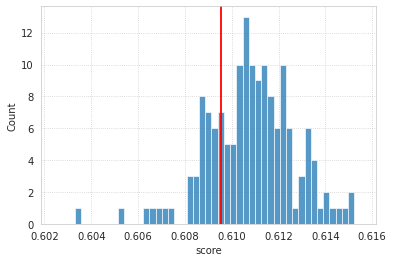

In [17]:
sns.histplot(df_tx.loc[df_tx['metric'] == 'mi', 'score'], bins=np.linspace(0.6025, 0.6155, 50))
plt.axvline(_df.loc[_df.metric == 'mi', 'score'].values.item(), color='r', lw=1.8)

In [18]:
warped = ants.apply_transforms(
    fixed=indiv,
    moving=reg.nissl,
    transformlist=best_tx['fwdtransforms'],
    interpolator='linear',
)
iso_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=reg.iso,
    transformlist=best_tx['fwdtransforms'],
    interpolator='genericLabel',
)
vis_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=reg.vis,
    transformlist=best_tx['fwdtransforms'],
    interpolator='genericLabel',
)
mask_r_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=reg.mask_r,
    transformlist=best_tx['fwdtransforms'],
    interpolator='genericLabel',
)
mask_l_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=reg.mask_l,
    transformlist=best_tx['fwdtransforms'],
    interpolator='genericLabel',
)

mi = ants.image_mutual_information(indiv, warped)
mi_base = ants.image_mutual_information(indiv, indiv)

score_iso = symmetry_score(
    m=iso_indiv.numpy().astype(bool),
    mask_l=mask_l_indiv.numpy().astype(bool),
    mask_r=mask_r_indiv.numpy().astype(bool),
)
score_vis = symmetry_score(
    m=vis_indiv.numpy().astype(bool),
    mask_l=mask_l_indiv.numpy().astype(bool),
    mask_r=mask_r_indiv.numpy().astype(bool),
)
print(f"mi: {mi / mi_base:.4f},\tiso: {score_iso:.4f},\tvis: {score_vis:.4f}")

mi: 0.5624,     iso: 0.9939,    vis: 0.9227

In [19]:
ants.image_write(iso_indiv, f"./{key}_iso_Best.nii.gz")
ants.image_write(vis_indiv, f"./{key}_vis_Best.nii.gz")

In [20]:
ants.image_write(iso_indiv * m_indiv, f"./{key}_iso-fixed_Best.nii.gz")
ants.image_write(vis_indiv * m_indiv, f"./{key}_vis-fixed_Best.nii.gz")

In [21]:
mi = ants.image_mutual_information(indiv, (warped * m_indiv))
mi_base = ants.image_mutual_information(indiv, indiv)

score_iso = symmetry_score(
    m=(iso_indiv * m_indiv).numpy().astype(bool),
    mask_l=mask_l_indiv.numpy().astype(bool),
    mask_r=mask_r_indiv.numpy().astype(bool),
)
score_vis = symmetry_score(
    m=(vis_indiv * m_indiv).numpy().astype(bool),
    mask_l=mask_l_indiv.numpy().astype(bool),
    mask_r=mask_r_indiv.numpy().astype(bool),
)
print(f"mi: {mi / mi_base:.4f},\tiso: {score_iso:.4f},\tvis: {score_vis:.4f}")

mi: 0.6208,     iso: 0.9993,    vis: 0.9939

In [23]:
np.quantile(df_tx.loc[df_tx['metric'] == 'mi_fixed', 'score'].values, [0.25, 0.50, 0.75])

array([0.56160812, 0.56411517, 0.56630193])

In [24]:
df_tx.loc[df_tx['metric'] == 'mi', 'score'] 

In [36]:
df = df_tx.loc[df_tx['score'] > 0.566]
df

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score,tx
5,0,SyN,0.15,32,20,0.5,sym_iso,0.967263,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
7,0,SyN,0.15,32,20,0.5,sym,0.653844,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
9,0,SyN,0.15,32,20,0.8,sym_iso,0.991167,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
10,0,SyN,0.15,32,20,0.8,sym_vis,0.913396,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
11,0,SyN,0.15,32,20,0.8,sym,0.952282,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
...,...,...,...,...,...,...,...,...,...
714,4,SyNAggro,0.30,32,20,0.5,sym_vis,0.961263,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
715,4,SyNAggro,0.30,32,20,0.5,sym,0.974431,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
717,4,SyNAggro,0.30,32,20,0.8,sym_iso,0.975307,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
718,4,SyNAggro,0.30,32,20,0.8,sym_vis,0.946252,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


In [40]:
df.loc[df['metric'] == 'sym', 'score'].argmax()

138

In [43]:
df.iloc[[138]]

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score,tx
203,1,ElasticSyN,0.15,32,20,0.8,sym,0.943592,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


In [64]:
_df = df_tx.loc[df_tx['metric'] == 'mi']
_df.iloc[[_df['score'].argmax()]]

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score,tx
532,3,SyNAggro,0.15,32,20,0.5,mi,0.571504,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


In [65]:
_df = df_tx.loc[
    (df_tx['seed'] == 3) &
    (df_tx['type'] == 'SyNAggro') &
    (df_tx['grad'] == 0.15) &
    (df_tx['syn_bin'] == 32) &
    (df_tx['aff_bin'] == 20) &
    (df_tx['aff_rate'] == 0.5)
]
_df

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score,tx
532,3,SyNAggro,0.15,32,20,0.5,mi,0.571504,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
533,3,SyNAggro,0.15,32,20,0.5,sym_iso,0.985965,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
534,3,SyNAggro,0.15,32,20,0.5,sym_vis,0.932584,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
535,3,SyNAggro,0.15,32,20,0.5,sym,0.959275,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


In [28]:
_df = df_tx.loc[df_tx['metric'] == 'mi_fixed']
_df = _df.iloc[_df['score'].argmax()]
print(_df.to_string())

tx = _df['tx']

seed                                                        2
type                                                      SyN
grad                                                      0.3
syn_bin                                                    32
aff_bin                                                    20
aff_rate                                                  0.2
metric                                               mi_fixed
score                                                0.571354
tx          {'warpedmovout': ANTsImage (RAI)
         Pixel Type ...

In [29]:
warped = ants.apply_transforms(
    fixed=indiv,
    moving=reg.nissl,
    transformlist=tx['fwdtransforms'],
    interpolator='linear',
)
iso_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=reg.iso,
    transformlist=tx['fwdtransforms'],
    interpolator='genericLabel',
)
vis_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=reg.vis,
    transformlist=tx['fwdtransforms'],
    interpolator='genericLabel',
)
mask_r_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=reg.mask_r,
    transformlist=tx['fwdtransforms'],
    interpolator='genericLabel',
)
mask_l_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=reg.mask_l,
    transformlist=tx['fwdtransforms'],
    interpolator='genericLabel',
)

mi = ants.image_mutual_information(indiv, warped)
mi_base = ants.image_mutual_information(indiv, indiv)

score_iso = symmetry_score(
    m=iso_indiv.numpy().astype(bool),
    mask_l=mask_l_indiv.numpy().astype(bool),
    mask_r=mask_r_indiv.numpy().astype(bool),
)
score_vis = symmetry_score(
    m=vis_indiv.numpy().astype(bool),
    mask_l=mask_l_indiv.numpy().astype(bool),
    mask_r=mask_r_indiv.numpy().astype(bool),
)
print(f"mi: {mi / mi_base:.4f},\tiso: {score_iso:.4f},\tvis: {score_vis:.4f}")

mi: 0.5714,     iso: 0.9863,    vis: 0.9421

In [30]:
mi = ants.image_mutual_information(indiv, (warped * m_indiv))
mi_base = ants.image_mutual_information(indiv, indiv)

score_iso = symmetry_score(
    m=(iso_indiv * m_indiv).numpy().astype(bool),
    mask_l=mask_l_indiv.numpy().astype(bool),
    mask_r=mask_r_indiv.numpy().astype(bool),
)
score_vis = symmetry_score(
    m=(vis_indiv * m_indiv).numpy().astype(bool),
    mask_l=mask_l_indiv.numpy().astype(bool),
    mask_r=mask_r_indiv.numpy().astype(bool),
)
print(f"mi: {mi / mi_base:.4f},\tiso: {score_iso:.4f},\tvis: {score_vis:.4f}")

mi: 0.6225,     iso: 0.9909,    vis: 0.9969

In [31]:
ants.image_write(iso_indiv * m_indiv, f"./{key}_iso-fixed_2nd-Best.nii.gz")
ants.image_write(vis_indiv * m_indiv, f"./{key}_vis-fixed_2nd-Best.nii.gz")

In [32]:
reg.nissl

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (132, 80, 114)
         Spacing    : (0.1, 0.1, 0.1)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [48]:
tess = ants.image_read('./final_tesselation.nii.gz')
tess = reset_ants_img(
    img=reorient_arr(tess.numpy(), (2, 1, 0))[:, ::-1, :],
    dtype='uint32',
)
tess

ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (132, 80, 114)
         Spacing    : (0.1, 0.1, 0.1)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [51]:
ants.image_write(tess, "./tess.nii.gz")

<seaborn.axisgrid.FacetGrid object at 0x7e3a006e8820>

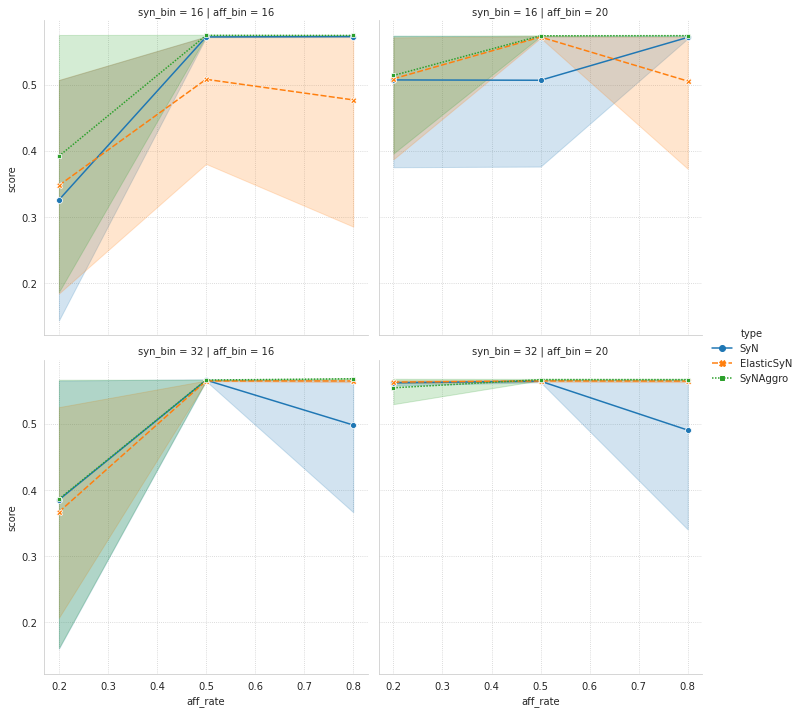

In [23]:
sns.relplot(
    data=df_tx.loc[df_tx['metric'] == 'mi'],
    x='aff_rate',
    y='score',
    hue='type',
    style='type',
    markers=True,
    row='syn_bin',
    col='aff_bin',
    kind='line',
)

<seaborn.axisgrid.FacetGrid object at 0x7e3a8406c460>

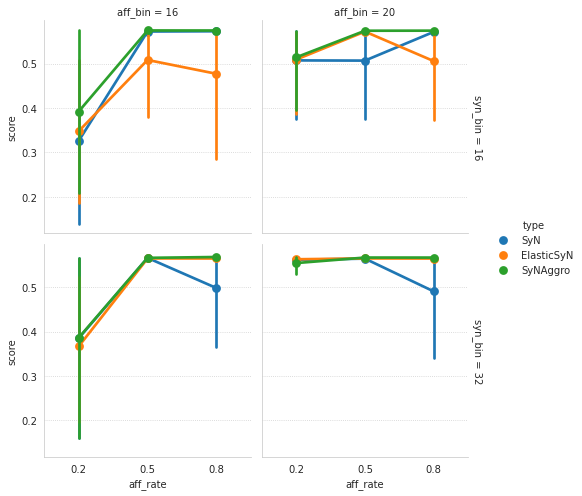

In [20]:
sns.catplot(
    data=df_tx.loc[df_tx['metric'] == 'mi'],
    x='aff_rate',
    y='score',
    hue='type',
    row='syn_bin',
    col='aff_bin',
    kind='point',
    margin_titles=True,
    size=3.5,
)

<seaborn.axisgrid.FacetGrid object at 0x7e39dc1b3b50>

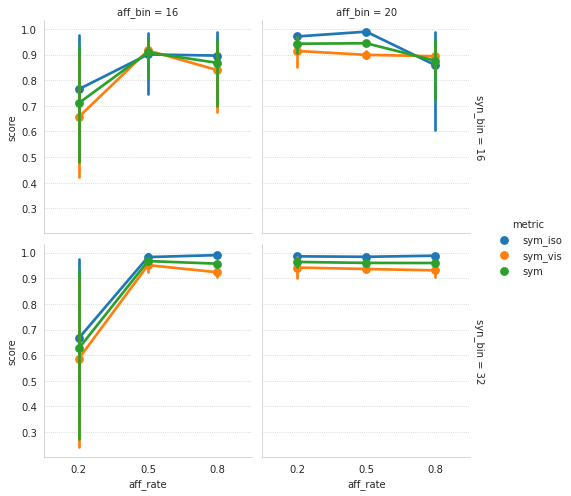

In [26]:
_df = df_tx.loc[
    (df_tx['metric'] != 'mi') &
    (df_tx['type'] == 'ElasticSyN')
]

sns.catplot(
    data=_df,
    x='aff_rate',
    y='score',
    hue='metric',
    row='syn_bin',
    col='aff_bin',
    kind='point',
    margin_titles=True,
    size=3.5,
)

In [11]:
df = df_tx.loc[
    (df_tx['grad'] == 0.2) &
    (df_tx['syn_bin'] == 32) &
    (df_tx['aff_bin'] == 20)
]

In [12]:
_df = df.loc[df['metric'] == 'sym']
_df.iloc[[_df['score'].argmax()]]

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score,tx
519,3,ElasticSyN,0.2,32,20,0.2,sym,0.991681,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


In [13]:
df = df_tx.loc[
    (df_tx['seed'] == 3) &
    (df_tx['grad'] == 0.2) &
    (df_tx['syn_bin'] == 32) &
    (df_tx['aff_bin'] == 20) &
    (df_tx['aff_rate'] == 0.2)
]
df

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score,tx
468,3,SyN,0.2,32,20,0.2,mi,0.563738,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
469,3,SyN,0.2,32,20,0.2,sym_iso,0.983077,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
470,3,SyN,0.2,32,20,0.2,sym_vis,0.887534,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
471,3,SyN,0.2,32,20,0.2,sym,0.935306,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
516,3,ElasticSyN,0.2,32,20,0.2,mi,0.562449,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
517,3,ElasticSyN,0.2,32,20,0.2,sym_iso,0.986236,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
518,3,ElasticSyN,0.2,32,20,0.2,sym_vis,0.997126,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
519,3,ElasticSyN,0.2,32,20,0.2,sym,0.991681,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
564,3,SyNAggro,0.2,32,20,0.2,mi,0.505082,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
565,3,SyNAggro,0.2,32,20,0.2,sym_iso,0.952504,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


In [60]:
tx = df['tx'].iloc[0]

In [61]:
warped = ants.apply_transforms(
    fixed=indiv,
    moving=reg.nissl,
    transformlist=tx['fwdtransforms'],
    interpolator='linear',
)
iso_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=reg.iso,
    transformlist=tx['fwdtransforms'],
    interpolator='genericLabel',
)
vis_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=reg.vis,
    transformlist=tx['fwdtransforms'],
    interpolator='genericLabel',
)
mask_r_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=reg.mask_r,
    transformlist=tx['fwdtransforms'],
    interpolator='genericLabel',
)
mask_l_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=reg.mask_l,
    transformlist=tx['fwdtransforms'],
    interpolator='genericLabel',
)

mi = ants.image_mutual_information(indiv, warped)
mi_base = ants.image_mutual_information(indiv, indiv)

score_iso = symmetry_score(
    m=iso_indiv.numpy().astype(bool),
    mask_l=mask_l_indiv.numpy().astype(bool),
    mask_r=mask_r_indiv.numpy().astype(bool),
)
score_vis = symmetry_score(
    m=vis_indiv.numpy().astype(bool),
    mask_l=mask_l_indiv.numpy().astype(bool),
    mask_r=mask_r_indiv.numpy().astype(bool),
)
print(f"mi: {mi / mi_base:.4f},\tiso: {score_iso:.4f},\tvis: {score_vis:.4f}")

mi: 0.5713,     iso: 0.9739,    vis: 0.9370

In [62]:
ants.image_write(iso_indiv, f"./{key}_iso_2nd.nii.gz")
ants.image_write(vis_indiv, f"./{key}_vis_2nd.nii.gz")

In [ ]:
sns.pointplot(data=df_tx, x='aff_rate', y='score', hue='metric')
plt.ylim(0.8, 1.0)

(0.8, 1.0)

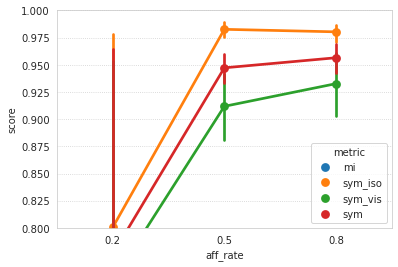

(0.9, 1.0)

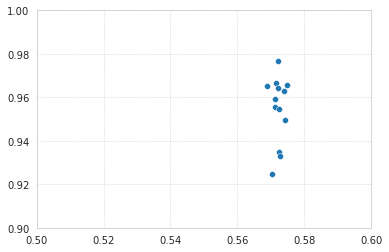

In [14]:
sns.scatterplot(
    x=df_tx.loc[df_tx.metric == 'mi', 'score'].values,
    y=df_tx.loc[df_tx.metric == 'sym', 'score'].values,
)
plt.xlim(0.5, 0.6)
plt.ylim(0.9, 1.0)

In [17]:
_df = df_tx.loc[df_tx.metric == 'sym']
#_df = _df.groupby(['type', 'grad', 'syn_bin', 'aff_bin', 'aff_rate']).mean()
best_params = _df.iloc[[_df['score'].argmax()]]
best_params

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score,tx
59,4,SyN,0.2,16,16,0.8,sym,0.976611,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


In [41]:
_df = df_tx.loc[df_tx.metric == 'sym']
best_params = _df.iloc[_df['score'].argmax()]
best_params = best_params.drop(['metric', 'score', 'tx'])
best_params = dict(zip(
    best_params.index,
    best_params.values,
))
best_params

{
    'seed': 4,
    'type': 'SyN',
    'grad': 0.2,
    'syn_bin': 16,
    'aff_bin': 16,
    'aff_rate': 0.8
}

In [42]:
cond = [
    np.array(df_tx[k] == v)
    for k, v in best_params.items()
]
# noinspection PyTypeChecker
cond = functools.reduce(np.logical_and, cond)

In [43]:
df_tx.loc[cond]

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score,tx
56,4,SyN,0.2,16,16,0.8,mi,0.572018,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
57,4,SyN,0.2,16,16,0.8,sym_iso,0.976866,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
58,4,SyN,0.2,16,16,0.8,sym_vis,0.976356,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
59,4,SyN,0.2,16,16,0.8,sym,0.976611,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


In [46]:
reg.iso.sum(), reg.vis.sum()

(123245.0, 13489.0)

In [61]:
np.quantile(df_tx.loc[df_tx.metric == 'sym_vis', 'score'], 0.9)

0.9641175426915468

In [52]:
df_tx.loc[df_tx.metric == 'sym_iso']

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score,tx
1,0,SyN,0.2,16,16,0.2,sym_iso,0.984663,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
5,0,SyN,0.2,16,16,0.5,sym_iso,0.994393,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
9,0,SyN,0.2,16,16,0.8,sym_iso,0.987289,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
13,1,SyN,0.2,16,16,0.2,sym_iso,0.778761,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
17,1,SyN,0.2,16,16,0.5,sym_iso,0.983813,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
21,1,SyN,0.2,16,16,0.8,sym_iso,0.986719,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
25,2,SyN,0.2,16,16,0.2,sym_iso,0.975450,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
29,2,SyN,0.2,16,16,0.5,sym_iso,0.988164,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
33,2,SyN,0.2,16,16,0.8,sym_iso,0.986495,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
37,3,SyN,0.2,16,16,0.2,sym_iso,0.972826,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


In [53]:
df_tx.loc[df_tx.metric == 'sym_vis']

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score,tx
2,0,SyN,0.2,16,16,0.2,sym_vis,0.945695,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
6,0,SyN,0.2,16,16,0.5,sym_vis,0.854667,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
10,0,SyN,0.2,16,16,0.8,sym_vis,0.911924,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
14,1,SyN,0.2,16,16,0.2,sym_vis,0.437500,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
18,1,SyN,0.2,16,16,0.5,sym_vis,0.885753,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
22,1,SyN,0.2,16,16,0.8,sym_vis,0.879032,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
26,2,SyN,0.2,16,16,0.2,sym_vis,0.956104,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
30,2,SyN,0.2,16,16,0.5,sym_vis,0.922764,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
34,2,SyN,0.2,16,16,0.8,sym_vis,0.931787,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
38,3,SyN,0.2,16,16,0.2,sym_vis,0.953103,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


In [24]:
_df.iloc[[_df['score'].argmax()]]

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score,tx
59,4,SyN,0.2,16,16,0.8,sym,0.976611,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


In [ ]:
cond = [
    np.array(_df[k] == v)
    for k, v in best_params.items()
]
# noinspection PyTypeChecker
cond = functools.reduce(np.logical_and, cond)
_df = _df.loc[cond]
_df

  0%|          | 0/5 [00:00<?, ?it/s]

nissl2yale, perf:
seed               0
type             SyN
grad             0.2
syn_bin           16
aff_bin           16
aff_rate         0.8
metric            mi
score       0.577593

<AxesSubplot:xlabel='aff_rate', ylabel='score'>

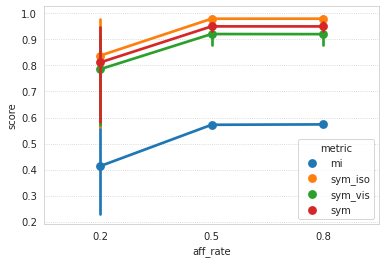

In [6]:
sns.pointplot(data=df_tx, x='aff_rate', y='score', hue='metric')

(0.8, 1.0)

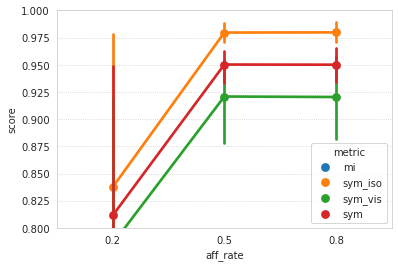

In [5]:
df_tx, best_tx, perf = reg.fit_register(
    mode='3d',
    name='nissl2yale',
    fixed=indiv,
    moving=reg.nissl,
    save_results=False,
    types=['SyN'],
    grads=[0.2],
    syn_bins=[16],
    aff_bins=[16],
    aff_rates=[0.2, 0.5, 0.8],
    n_seeds=5,
)

  0%|          | 0/5 [00:00<?, ?it/s]

nissl2yale, perf:
seed               1
type             SyN
grad             0.2
syn_bin           16
aff_bin           16
aff_rate         0.5
metric            mi
score       0.573164

<AxesSubplot:xlabel='aff_rate', ylabel='score'>

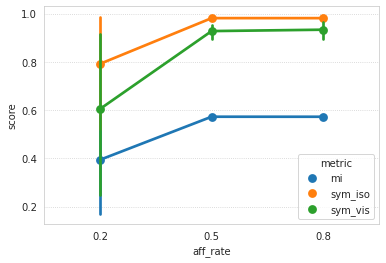

In [9]:
sns.pointplot(data=df_tx, x='aff_rate', y='score', hue='metric')

(0.9, 1.0)

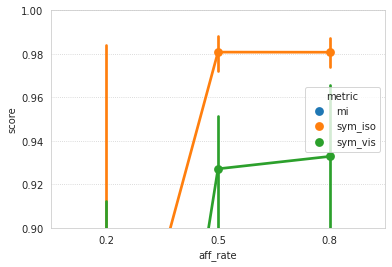

In [11]:
sns.pointplot(data=df_tx, x='aff_rate', y='score', hue='metric')
plt.ylim(0.9, 1.0)

In [12]:
df_tx.groupby(['type', 'grad', 'syn_bin', 'aff_bin', 'aff_rate']).mean()

seed 
 score 
 
 
 type 
 grad 
 syn_bin 
 aff_bin 
 aff_rate 
 
 
 
 
 
 
 SyN 
 0.2 
 16 
 16 
 0.2 
 2.0 
 0.596403 
 
 
 0.5 
 2.0 
 0.826730 
 
 
 0.8 
 2.0 
 0.828575

In [14]:
df_tx.loc[df_tx.aff_rate == 0.8]

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score,tx
6,0,SyN,0.2,16,16,0.8,mi,0.569669,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
7,0,SyN,0.2,16,16,0.8,sym_iso,0.967661,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
8,0,SyN,0.2,16,16,0.8,sym_vis,0.963839,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
15,1,SyN,0.2,16,16,0.8,mi,0.572529,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
16,1,SyN,0.2,16,16,0.8,sym_iso,0.990427,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
17,1,SyN,0.2,16,16,0.8,sym_vis,0.858871,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
24,2,SyN,0.2,16,16,0.8,mi,0.571539,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
25,2,SyN,0.2,16,16,0.8,sym_iso,0.986789,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
26,2,SyN,0.2,16,16,0.8,sym_vis,0.943681,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
33,3,SyN,0.2,16,16,0.8,mi,0.573750,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


In [15]:
df_tx.loc[df_tx.metric == 'sym_iso']

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score,tx
1,0,SyN,0.2,16,16,0.2,sym_iso,0.995092,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
4,0,SyN,0.2,16,16,0.5,sym_iso,0.982538,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
7,0,SyN,0.2,16,16,0.8,sym_iso,0.967661,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
10,1,SyN,0.2,16,16,0.2,sym_iso,0.714844,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
13,1,SyN,0.2,16,16,0.5,sym_iso,0.991523,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
16,1,SyN,0.2,16,16,0.8,sym_iso,0.990427,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
19,2,SyN,0.2,16,16,0.2,sym_iso,0.980078,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
22,2,SyN,0.2,16,16,0.5,sym_iso,0.987858,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
25,2,SyN,0.2,16,16,0.8,sym_iso,0.986789,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
28,3,SyN,0.2,16,16,0.2,sym_iso,0.970670,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


- objective 1: find a criterion that returns the best fit
- objective 2: find other ones that are not the best (according to criterion in objective 1) but they look better if visualized
- objective 3: is it good enough to just choose the best performing one in objective 1? or should I revise the criterion?